In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def lib(FileName):
    def openFile(FileName):
        read_data = open(f'{FileName}')
        data = read_data.read()
        data = data.splitlines()
        read_data.close()
        
        return data
        
    lib = {}
    
    for line in openFile(FileName):
        if line != 'CloneID Familienummer':
            line_list = line.split()
            if len(line_list[1:]) == 1:
                lib[int(line_list[0])] = int(line_list[1])
            else:
                lib[int(line_list[0])] = line_list[1:]
            
    return lib
            
lib_family = lib('..\Data\CloneIdFamily.txt')
lib_clust = lib('..\Data\kmca_results.txt')

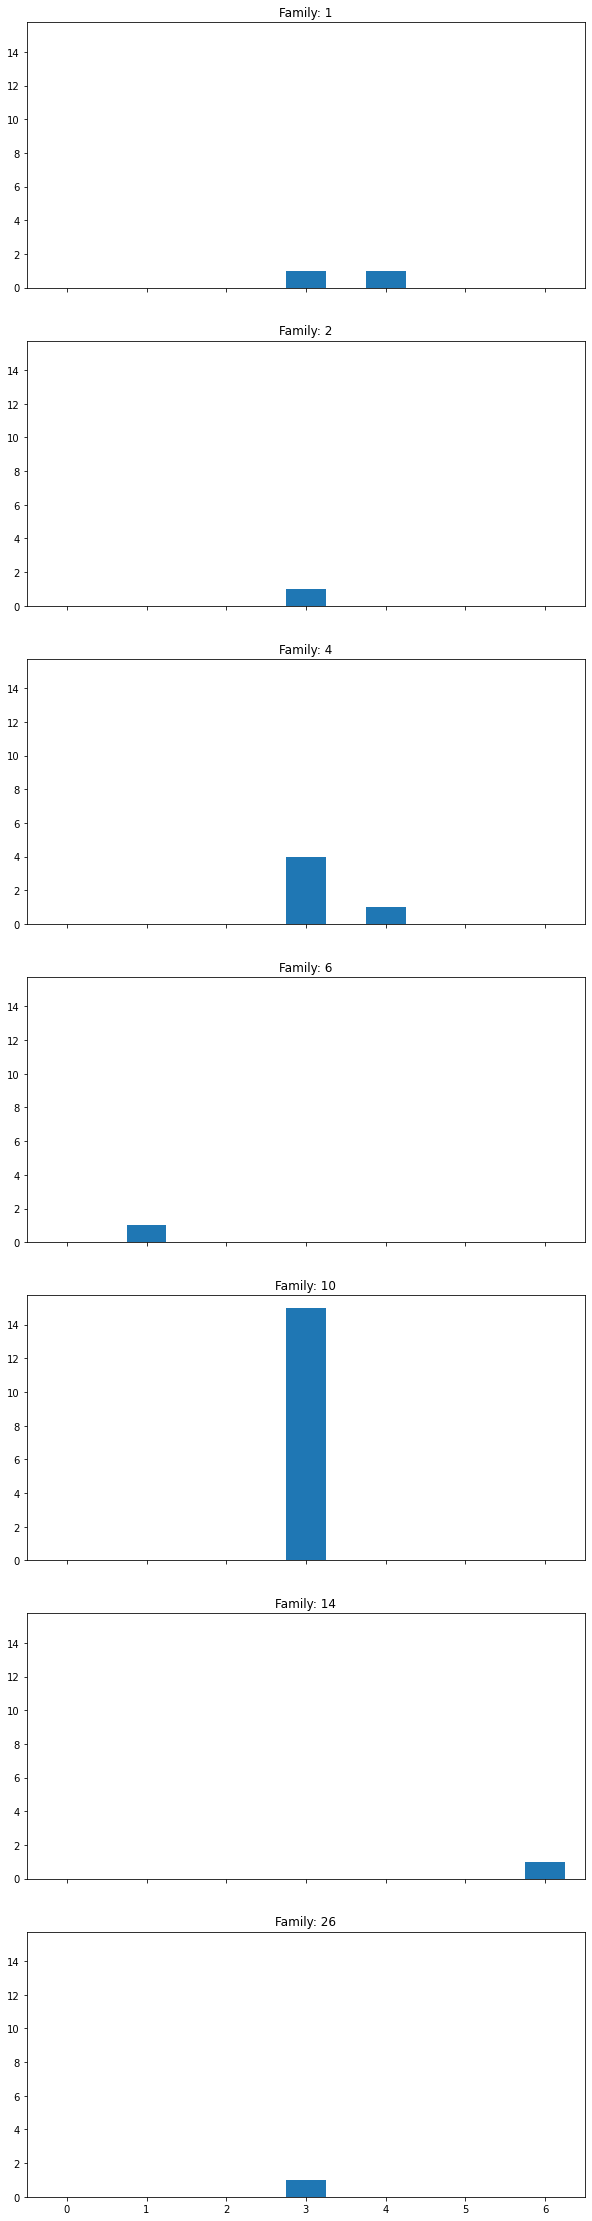

In [2]:
def making_histograms(data_fam, data_clust):
    fam_clust = {}
    nr_of_familys = max(list(data_fam.values()))
    
    highest_cluster = max(list(data_clust.values()))
    for family in range(1,nr_of_familys+1):
        clusters = []
        count = {}
        IDs = [ID  for (ID, value) in data_fam.items() if value == family]
        for ID in IDs:
            if ID in list(data_clust.keys()):
                clusters.append(data_clust[ID])
            if len(clusters)>0:
                if max(clusters) > highest_cluster:
                    highest_cluster = max(clusters)
            
            for cluster in range(highest_cluster+1):
                count[cluster] = clusters.count(cluster)
        for cluster in count.keys():
            if count[cluster]>0:
                fam_clust[family] = count
    
    aantal_plots = 0
    for family in list(fam_clust.keys()):
        if fam_clust[family] != {}:
            aantal_plots += 1    
    
    fig, axes = plt.subplots(ncols=1,nrows=aantal_plots, sharex=True, sharey=True, figsize=(10,40))
    plot=0
    for family in list(fam_clust.keys()):
        if fam_clust[family] != {}:
            ax_to_use = axes[plot]
            df = pd.DataFrame(fam_clust[family], index=list(range(len(list(fam_clust[family]))))).head(1).transpose()
            df.plot(kind='bar',ax=ax_to_use, legend=False)
            ax_to_use.set_title(f'Family: {family}')
            ax_to_use.tick_params(labelrotation=0)
            plot += 1
            
    return fam_clust

fam_clust = making_histograms(lib_family, lib_clust)

In [3]:
aantal_plots = 0
for family in list(fam_clust.keys()):
    if fam_clust[family] != {}:
        aantal_plots += 1

#fig, axes = plt.subplots(ncols=1,nrows=aantal_plots, figsize=(10,40))
plot=0
for family in list(fam_clust.keys()):
    if fam_clust[family] != {}:
        ax_to_use = axes[plot]
        df = pd.DataFrame(fam_clust[family], index=list(range(len(list(fam_clust[family]))))).head(1).transpose()
        
        df.rename(columns={0: family},inplace = True)
        df.plot(kind='pie', subplots=False, title=f'Family: {family}')
        ax_to_use.set_title(f'Family: {family}')
        plot += 1


NameError: name 'axes' is not defined

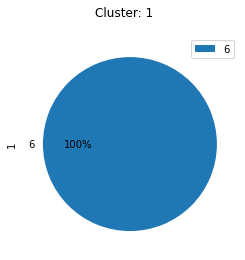

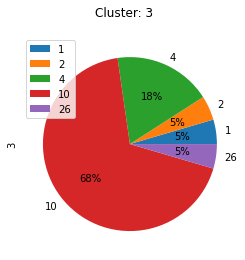

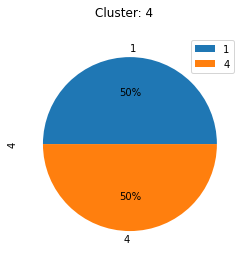

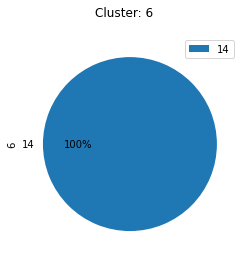

In [4]:
def pie_chart(data_fam, data_clust):
    cluster_fam = {}
    cluster_fam_frequency = {}
    cluster = []
    for ID in data_clust:
        cluster.append(data_clust[ID])
    unique_clusters = np.unique(cluster)
    
    for cluster in unique_clusters:
        cluster_fam_frequency[cluster] = []
    
    for ID in data_fam:
        if ID in data_clust:
            cluster_fam_frequency[data_clust[ID]].append(data_fam[ID])
    
    for cluster in cluster_fam_frequency:
        frequency = {}
        for unique_fam in np.unique(cluster_fam_frequency[cluster]):
            frequency[unique_fam] = cluster_fam_frequency[cluster].count(unique_fam)
        cluster_fam[cluster] = frequency
    
    plot=0
    for cluster in cluster_fam:
        if cluster_fam[cluster] != {}:
            df = pd.DataFrame(cluster_fam[cluster], index=list(range(len(list(cluster_fam[cluster]))))).head(1).transpose()
            df.rename(columns={0: cluster},inplace = True)
            df.plot(kind='pie', subplots=True, title=f'Cluster: {cluster}', autopct='%.0f%%')
            plot += 1
    
    return cluster_fam

pie_chart = pie_chart(lib_family,lib_clust)